## K-Means Clustering Algos (Unsupervised Learning)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs  # For random clustering data sets
from sklearn.cluster import KMeans

## Note in clustering theres no output var so we dont going to use y but this makeblob also returns y value so we just storing it in y but will use only X


In [4]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=23)
X.shape

(1000, 2)

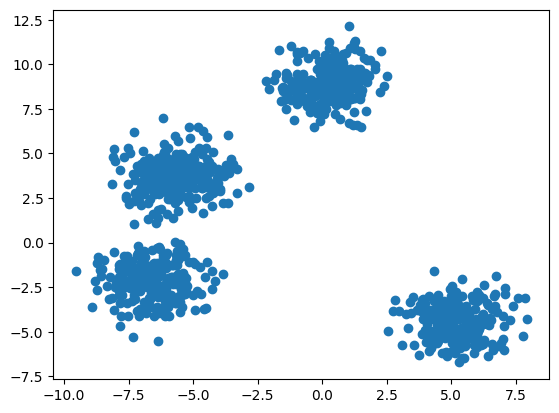

In [7]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
## Finding K value
# Manual Process - Elbow Method

wcss = []
for k in range(1, 20) :
  kMeans = KMeans(n_clusters = k, init = 'k-means++')
  kMeans.fit(X_train)
  wcss.append(kMeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

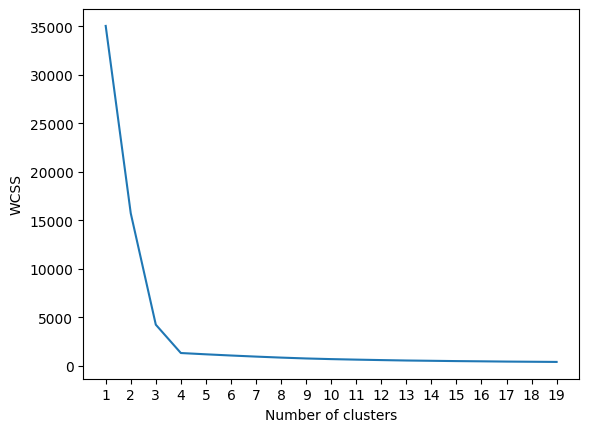

In [14]:
plt.plot(range(1, 20), wcss)
plt.xticks(range(1, 20))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Above clearly seeing that cluster values k = 4

In [18]:
## K = 4 so model

kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_lables = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


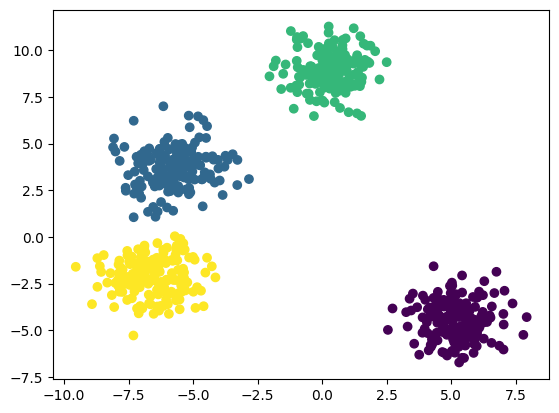

In [19]:
## Plotting data with predicted lables

plt.scatter(X_train[:,0], X_train[:,1], c = y_lables)

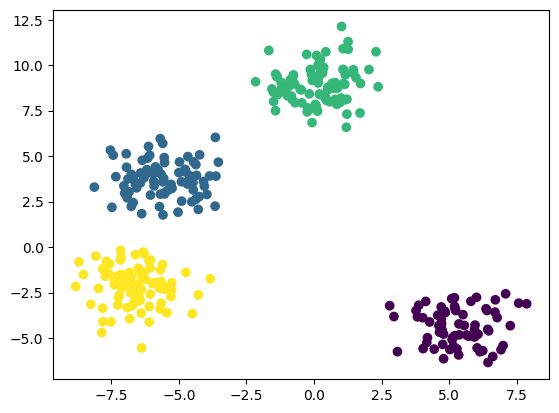

In [20]:
y_test_lables = kmeans.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_lables)

## Automation of finding K value

In [29]:
#!pip install kneed
# Convex --> Decreasing wcss
# Concave --> Increasing wcss
from kneed import KneeLocator

kl = KneeLocator(range(1, 20), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

4